In [18]:
import numpy as np
import pandas as pd
import pystan
from scipy.stats import norm, multivariate_normal, invwishart, invgamma, bernoulli
from statsmodels.tsa.stattools import acf
import datetime
import sys
import os

from codebase.plot import * 
from codebase.data import * 
from codebase.file_utils import save_obj, load_obj

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
num_chains = 1
num_samples = 1000
num_warmup = 1000
num_iter = num_samples + num_warmup

In [86]:
log_dir = "./log/bin_sim_1factor/sim0/20191121_114054_bin_sim0_m2/"
data = load_obj('data', log_dir)
ps = load_obj('ps', log_dir)
print(data['random_seed'])
ps.keys()


0


dict_keys(['beta', 'alpha', 'zz', 'uu', 'Omega'])

In [87]:
log_dir1 = "./log/bin_sim_1factor/sim2/20191121_134457_bin_sim2_m2/"
data1 = load_obj('data', log_dir1)
ps1 = load_obj('ps', log_dir1)
print(data1['random_seed'])
ps1.keys()

0


dict_keys(['beta', 'alpha', 'zz', 'uu', 'Omega'])

In [90]:
print(np.mean(data['D'],0))
print(np.mean(data1['D'],0))

[0.368 0.575 0.269 0.208 0.374 0.129]
[0.371 0.581 0.271 0.21  0.376 0.131]


In [91]:
%%opts Layout [fig_size=200]
plots = []
for j in range(data['J']):
        plots.append(plot_trace(ps['beta'][:,j],
             true_value=data['beta'][j],
             title = 'Posterior distribution for beta(%s)'%(j)).\
                     options(fig_inches=8, aspect=3))
layout = hv.Layout(plots).options(show_title = True,
                                  vspace = .3,
                                  absolute_scaling=False,
                                  normalize=False) # use same y-range for all plots?

layout.cols(2)


:Layout
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_2_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_3_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_4_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_5_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)

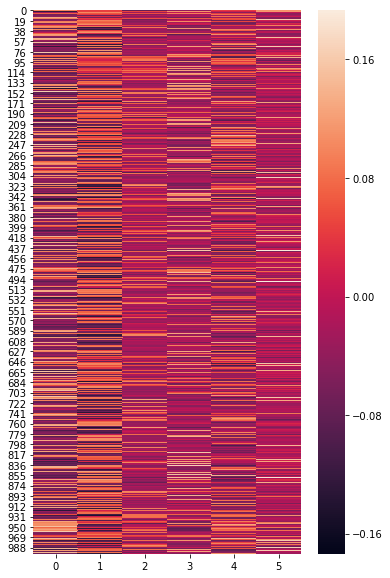

In [92]:
mu = np.mean(ps['uu'],0)
plt.figure(figsize=(6,10))
ax = sns.heatmap(mu, cbar = True )

In [93]:
print(np.round(np.mean(mu,0)*1e4, 2))
hv.Bars(np.mean(abs(mu),0)).options(color='blue', xrotation=90).options(fig_inches=8, aspect=3)

[ 1.59  1.97 -3.48 -6.01 -1.04 -1.4 ]


:Bars   [x]   (y)

In [94]:
print("Avg 0-900 = %.2f \nAvg 901-1000 = %.2f"%(np.mean(mu[:900])*1e3,np.mean(mu[900:])*1e3))

Avg 0-900 = -0.47 
Avg 901-1000 = 2.82


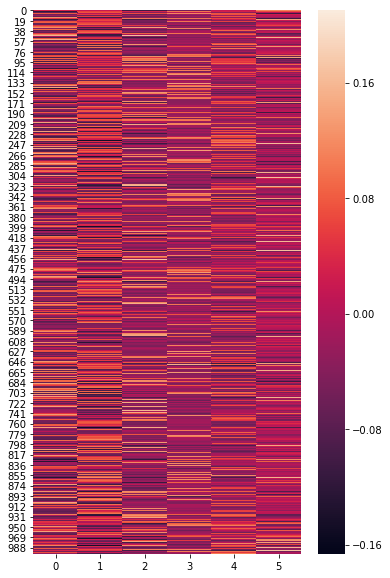

In [95]:
mu1 = np.mean(ps1['uu'],0)
plt.figure(figsize=(6,10))
ax = sns.heatmap(mu1, cbar = True )

In [96]:
print(np.round(np.mean(mu1,0)*1e4, 2))
hv.Bars(np.mean(abs(mu1),0)).options(color='blue', xrotation=90).options(fig_inches=8, aspect=3)

[ 4.36 -5.07  2.01 -3.42 -0.86  7.56]


:Bars   [x]   (y)

In [98]:
print("Avg 0-900 = %.2f \nAvg 901-1000 = %.2f"%(np.mean(mu[:900])*1e3,np.mean(mu[900:])*1e3))

Avg 0-900 = -0.47 
Avg 901-1000 = 2.82


In [99]:
print("Avg 0-900 = %.2f \nAvg 901-1000 = %.2f"%(np.mean(mu1[:900])*1e3,np.mean(mu1[900:])*1e3))

Avg 0-900 = -0.22 
Avg 901-1000 = 2.70


## Residual Analysis

In [121]:
# %%opts Bars {+axiswise} [width=1000, height=300, ] 
res = pd.DataFrame(np.mean(abs(np.mean(ps1['uu'], 0)),1))
res.columns = ['avg_u']
res.reset_index(inplace=True)
res.sort_values('avg_u', ascending=False, inplace=True)
hv.Bars(res[:20],).options(color='blue', xrotation=90).options(fig_inches=8, aspect=3)


:Bars   [index]   (avg_u)